In [ ]:
import os
coauthorships_path=os.path.join(os.getcwd(), "data", "coauthorships.txt")

In [ ]:

import networkx as nx
g = nx.read_edgelist(coauthorships_path,
                     create_using=nx.Graph(), nodetype=int)
nx.info(g)


'Graph with 217801 nodes and 1718164 edges'

In [ ]:
adjacency = nx.adjacency_matrix(g)

In [ ]:
import numpy as np

In [ ]:
from sknetwork.embedding import SVD

svd = SVD()

embedding = svd.fit_transform(adjacency)
embedding.shape

(217801, 2)

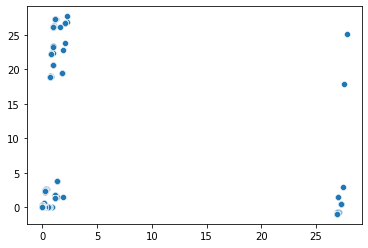

In [ ]:
import seaborn as sn
sn.scatterplot(x=embedding[:,0], y=embedding[:,1])

In [ ]:
from sknetwork.embedding import PCA
pca = PCA(n_components=2, normalized=True)

embedding = pca.fit_transform(adjacency)
embedding.shape

(217801, 2)

In [ ]:
print(embedding)

[[-0.00012958  0.00012556]
 [-0.00012954  0.00012551]
 [-0.00012955  0.00012552]
 ...
 [-0.00012953  0.00012549]
 [-0.00012953  0.00012549]
 [-0.00012953  0.00012549]]


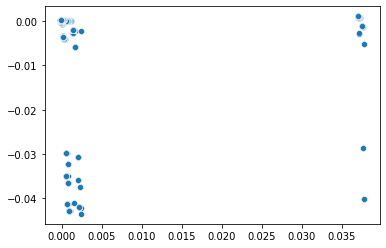

In [ ]:
import seaborn as sn
sn.scatterplot(x=embedding[:,0], y=embedding[:,1])

In [ ]:
from sknetwork.topology import CoreDecomposition
kcore = CoreDecomposition()
kcore.fit(adjacency)
kcore.core_value_

724

In [ ]:
from sknetwork.embedding import Spectral
spectral = Spectral(n_components=3)
embedding = spectral.fit_transform(adjacency)
embedding.shape

(217801, 3)

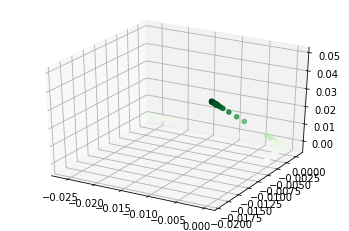

In [ ]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(embedding[:,0], embedding[:,1], embedding[:,2], c=embedding[:,2], cmap="Greens")